# Movie Recommender System

            
  ### 1.   Load and Merge Datasets
  ### 2.   Initial Cleaning
  ### 3.   Feature Engineering
  ### 4.   Preprocessing 
  #### 5.   EDA (Basic Data Analysis with Visuals)
  #### 6.   Build Recommender System using KNN
  ### 7.   Model Validation and Evaluation
  ### 8. NLP

### Imports

In [1]:
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors




### 1. Load and Merge datasets

Datasets from Kaggle. This dataset contains almost 5000 movies' data. We will work on it to make Recommender ML model using KNN. 

In [2]:
# load the datasets and merge them according to title

movies = pd.read_csv("D:\\DATA_SCIENCE_BOOTCAMP\\Movie_recommender\\tmdb_5000_movies.csv")

In [3]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [4]:
credits = pd.read_csv("D:\\DATA_SCIENCE_BOOTCAMP\\Movie_recommender\\tmdb_5000_credits.csv")

In [5]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [7]:
# merge them according to title
movies_all = pd.merge(movies, credits, on='title')

In [8]:
movies_all.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Initial Cleaning

In [9]:

# Remove rows where 'release_date' is missing since it's crucial for feature engineering
movies_all = movies_all.dropna(subset=['release_date'])

# You can drop other rows with too many missing values or irrelevant columns
# Example: Drop rows where important categorical features are missing
movies_all = movies_all.dropna(subset=['genres', 'cast', 'crew'])

# Drop columns that are not useful for recommendation
movies_all = movies_all.drop(columns=['homepage', 'status', 'tagline', 'overview'])


In [10]:
# check the dataframe 
movies_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 0 to 4808
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4808 non-null   int64  
 1   genres                4808 non-null   object 
 2   id                    4808 non-null   int64  
 3   keywords              4808 non-null   object 
 4   original_language     4808 non-null   object 
 5   original_title        4808 non-null   object 
 6   popularity            4808 non-null   float64
 7   production_companies  4808 non-null   object 
 8   production_countries  4808 non-null   object 
 9   release_date          4808 non-null   object 
 10  revenue               4808 non-null   int64  
 11  runtime               4806 non-null   float64
 12  spoken_languages      4808 non-null   object 
 13  title                 4808 non-null   object 
 14  vote_average          4808 non-null   float64
 15  vote_count           

## Feature Engineering

In [15]:

# Extracting year from release_date
movies_all['release_year'] = pd.to_datetime(movies_all['release_date']).dt.year

# Extracting the main genre from the genres column
def get_main_genre(genres):
    try:
        genres_list = ast.literal_eval(genres)
        if genres_list:
            return genres_list[0]['name']
    except:
        return None

movies_all['main_genre'] = movies_all['genres'].apply(get_main_genre)

# Preprocess Cast and Crew
def get_top_cast(cast, top_n=3):
    try:
        cast = ast.literal_eval(cast)
        return [member['name'] for member in cast[:top_n]]
    except:
        return []

def get_director(crew):
    try:
        crew = ast.literal_eval(crew)
        for member in crew:
            if member['job'] == 'Director':
                return member['name']
        return ''
    except:
        return ''

movies_all['top_cast'] = movies_all['cast'].apply(get_top_cast)
movies_all['director'] = movies_all['crew'].apply(get_director)



In [16]:

# Flatten the 'top_cast' list for preprocessing
movies_all['top_cast'] = movies_all['top_cast'].apply(lambda x: ' '.join(x))

# Update numerical and categorical columns
numerical_cols = ['popularity', 'vote_average', 'vote_count', 'release_year']
categorical_cols = ['main_genre', 'top_cast', 'director']

# Ensure correct data types for numerical columns
for col in numerical_cols:
    movies_all[col] = pd.to_numeric(movies_all[col], errors='coerce')


# Data Preprocessing 
    

In [18]:

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing
movies_features = movies_all[numerical_cols + categorical_cols]

# Define the pipeline with preprocessing and KNN
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', NearestNeighbors(n_neighbors=5, metric='cosine'))
])

# Fit the pipeline directly to the original features
pipeline.fit(movies_features)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['popularity', 'vote_average',
                                                   'vote_count',
                                                   'release_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['main_genre', 'top_cast',
                                                   'director'])])),
                ('knn', NearestNeighbors(metric='cosine'))])

## EDA

In [19]:

# Calculate the year span
min_year = movies_all['release_year'].min()
max_year = movies_all['release_year'].max()

# Output the year span
year_span = (min_year, max_year)
year_span


(1916, 2017)

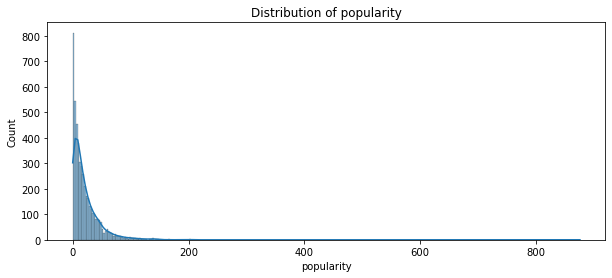

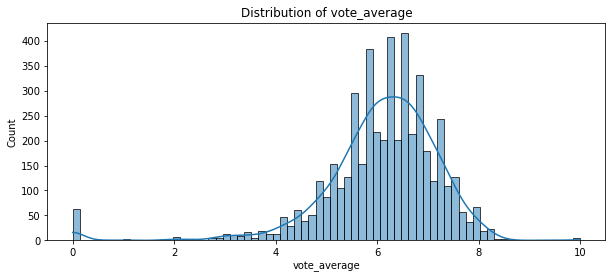

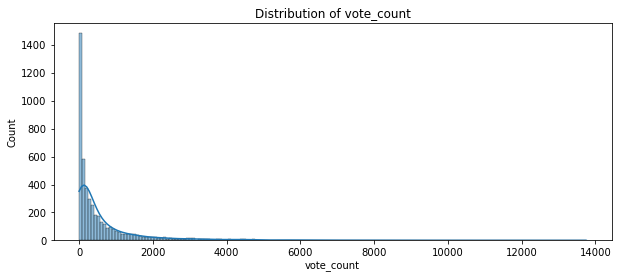

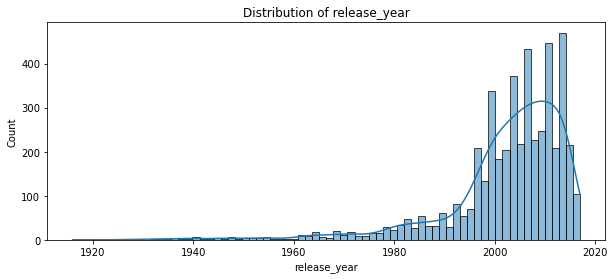

In [20]:

# EDA
# Numerical columns distribution
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(movies_all[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


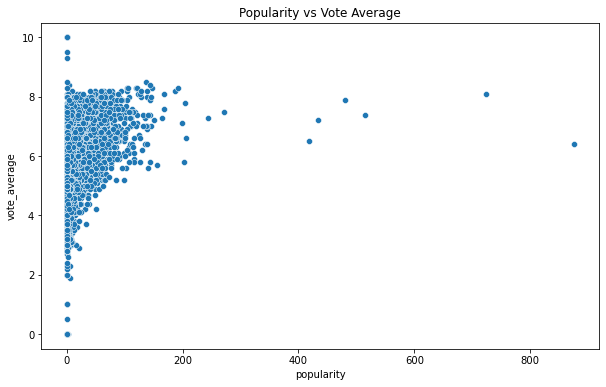

In [21]:
# Plot the popularity vs vote average
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='vote_average', data=movies_all)
plt.title('Popularity vs Vote Average')
plt.show()

# Function to get recommendation

In [22]:
# Function to get similar movies
def recommend_movie(movie_title, n_neighbors=5):
    # Handle case where movie is not found
    if movie_title not in movies_all['title'].values:
        return f"Movie '{movie_title}' not found in the dataset."

    # Get the index of the movie
    movie_idx = movies_all[movies_all['title'] == movie_title].index[0]
    
    # Extract the movie data as a DataFrame
    movie_data = movies_features.iloc[movie_idx].to_frame().T
    
    # Transform the input movie data
    movie_data_transformed = pipeline.named_steps['preprocessor'].transform(movie_data)
    
    # Find similar movies
    distances, indices = pipeline.named_steps['knn'].kneighbors(movie_data_transformed)
    similar_movie_indices = indices.flatten()
    
    # Get titles of similar movies
    similar_movies = movies_all.iloc[similar_movie_indices]['title']
    
    # Filter out the input movie from its own recommendations
    similar_movies = similar_movies[similar_movies != movie_title]
    
    return similar_movies

# Test the recommender system
print(recommend_movie('The Matrix'))

96                Inception
0                    Avatar
68                 Iron Man
3     The Dark Knight Rises
Name: title, dtype: object


## Model Evaluation

In [23]:

# Evaluate the model by manual inspection
test_movies = ['The Matrix', 'Titanic', 'Avatar']
for movie in test_movies:
    print(f"Recommendations for {movie}:")
    print(recommend_movie(movie))
    print("\n")

# Testing the recommender system with a movie name
movie_name = 'Inception'
print(f"Recommendations for {movie_name}:")
print(recommend_movie(movie_name))

Recommendations for The Matrix:
96                Inception
0                    Avatar
68                 Iron Man
3     The Dark Knight Rises
Name: title, dtype: object


Recommendations for Titanic:
662                   Fight Club
65               The Dark Knight
0                         Avatar
1887    The Shawshank Redemption
Name: title, dtype: object


Recommendations for Avatar:
96                Inception
68                 Iron Man
16             The Avengers
3     The Dark Knight Rises
Name: title, dtype: object


Recommendations for Inception:
3      The Dark Knight Rises
0                     Avatar
65           The Dark Knight
119            Batman Begins
Name: title, dtype: object


In [24]:
movie_name = 'The Avengers'
print(f"Recommendations for {movie_name}:")
print(recommend_movie(movie_name))

Recommendations for The Avengers:
96                Inception
0                    Avatar
65          The Dark Knight
3     The Dark Knight Rises
Name: title, dtype: object


In [25]:
movie_name = 'sherlock Holmes'
print(f"Recommendations for {movie_name}:")
print(recommend_movie(movie_name))

Recommendations for sherlock Holmes:
Movie 'sherlock Holmes' not found in the dataset.


In [26]:
movie_name = 'after'
print(f"Recommendations for {movie_name}:")
print(recommend_movie(movie_name))

Recommendations for after:
Movie 'after' not found in the dataset.


In [27]:
movie_name = 'The Notebook'
print(f"Recommendations for {movie_name}:")
print(recommend_movie(movie_name))

Recommendations for The Notebook:
2003                                              Her
2844                           The Fault in Our Stars
1887                         The Shawshank Redemption
329     The Lord of the Rings: The Return of the King
Name: title, dtype: object


In [28]:
movie_name = 'Star Wars'
print(f"Recommendations for {movie_name}:")
print(recommend_movie(movie_name))

Recommendations for Star Wars:
1996     The Empire Strikes Back
3342               The Godfather
2291          Back to the Future
1887    The Shawshank Redemption
Name: title, dtype: object


In [29]:
movie_name = 'Gladiator'
print(f"Recommendations for {movie_name}:")
print(recommend_movie(movie_name))

Recommendations for Gladiator:
119    Batman Begins
634       The Matrix
96         Inception
68          Iron Man
Name: title, dtype: object


In [30]:
movie_name = 'Rocky'
print(f"Recommendations for {movie_name}:")
print(recommend_movie(movie_name))

Recommendations for Rocky:
2176                             Psycho
2737             The Godfather: Part II
4608                       12 Angry Men
3726    One Flew Over the Cuckoo's Nest
Name: title, dtype: object


In [31]:
movie_name = 'Shrek'
print(f"Recommendations for {movie_name}:")
print(recommend_movie(movie_name))

Recommendations for Shrek:
565                                              Shrek 2
329        The Lord of the Rings: The Return of the King
330                The Lord of the Rings: The Two Towers
262    The Lord of the Rings: The Fellowship of the Ring
Name: title, dtype: object


In [32]:
movie_name = 'Superman'
print(f"Recommendations for {movie_name}:")
print(recommend_movie(movie_name))

Recommendations for Superman:
4541                      Seven Samurai
4078              From Russia with Love
3993                   The Wizard of Oz
4266    Snow White and the Seven Dwarfs
Name: title, dtype: object


In [33]:
movie_name = 'Frozen'
print(f"Recommendations for {movie_name}:")
print(recommend_movie(movie_name))

Recommendations for Frozen:
506               Despicable Me 2
88                     Big Hero 6
26     Captain America: Civil War
788                      Deadpool
Name: title, dtype: object


In [34]:
movie_name = 'Deadpool'
print(f"Recommendations for {movie_name}:")
print(recommend_movie(movie_name))

Recommendations for Deadpool:
94     Guardians of the Galaxy
127         Mad Max: Fury Road
28              Jurassic World
95                Interstellar
Name: title, dtype: object


In [35]:
movie_name = 'Interstellar'
print(f"Recommendations for {movie_name}:")
print(recommend_movie(movie_name))

Recommendations for Interstellar:
94     Guardians of the Galaxy
788                   Deadpool
28              Jurassic World
127         Mad Max: Fury Road
Name: title, dtype: object


### Note: There is a drawback with user input. If I enter movie name with slightly wrong spelling, it says there is no such movie in the database. So, we can handle it with text processing and get closest match using NLP. 

# Natural Language Processing

In [36]:
!pip install fuzzywuzzy python-Levenshtein


## Preprocess text (user_input and movie titles)

In [37]:
import nltk
from nltk.corpus import stopwords
import string
from fuzzywuzzy import process

# Download stopwords
nltk.download('stopwords')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## get_closest_match 

In [38]:

def get_closest_match(input_title, movie_titles):
    # Preprocess the input title
    input_title = preprocess_text(input_title)
    
    # Get the best match
    closest_match, score = process.extractOne(input_title, movie_titles)
    
    return closest_match, score



In [39]:

# Function to get similar movies with NLP preprocessing
def recommend_movie(movie_title, n_neighbors=5):
    # Preprocess movie titles in the dataset
    preprocessed_titles = movies_all['title'].apply(preprocess_text).tolist()
    
    # Get the closest match for the input movie title
    closest_match, score = get_closest_match(movie_title, preprocessed_titles)
    
    # Handle case where movie is not found or match score is low
    # how closely they match if they are not iddentical
    if score < 80:
        return f"Movie '{movie_title}' not found in the dataset. Closest match: '{closest_match}' with a score of {score}."

    # Get the index of the movie using the closest match
    movie_idx = preprocessed_titles.index(closest_match)
    
    # Extract the movie data as a DataFrame
    movie_data = movies_features.iloc[movie_idx].to_frame().T
    
    # Transform the input movie data
    movie_data_transformed = pipeline.named_steps['preprocessor'].transform(movie_data)
    
    # Find similar movies
    distances, indices = pipeline.named_steps['knn'].kneighbors(movie_data_transformed)
    similar_movie_indices = indices.flatten()
    
    # Get titles of similar movies
    similar_movies = movies_all.iloc[similar_movie_indices]['title']
    
    # Filter out the input movie from its own recommendations
    similar_movies = similar_movies[similar_movies != movies_all.iloc[movie_idx]['title']]
    
    return movies_all.iloc[movie_idx]['title'], similar_movies


# Model Validation (testing)

In [45]:
# Test the recommender system
def test_recommendations(movie_name):
    closest_match, recommendations = recommend_movie(movie_name)
    print(f"Input Movie: {movie_name}")
    print('\n')
    print(f"Closest Match in Dataset: {closest_match}")
    print('\n')
    print("Recommended Movies:")
    print(recommendations)


In [46]:
test_recommendations('shel holmes') # it is working properly even I enter movie title with typos or less letters

Input Movie: shel holmes


Closest Match in Dataset: Sherlock Holmes: A Game of Shadows


Recommended Movies:
8      Harry Potter and the Half-Blood Prince
26                 Captain America: Civil War
22        The Hobbit: The Desolation of Smaug
114       Harry Potter and the Goblet of Fire
Name: title, dtype: object


# Model Evaluation

In [47]:
# manual evaluation
test_movies = ['The Matrix', 'Titanic', 'Avatar']
for movie in test_movies:
    print(f"Recommendations for {movie}:")
    test_recommendations(movie)
    print("\n")


Recommendations for The Matrix:
Input Movie: The Matrix


Closest Match in Dataset: The Matrix


Recommended Movies:
96                Inception
0                    Avatar
68                 Iron Man
3     The Dark Knight Rises
Name: title, dtype: object


Recommendations for Titanic:
Input Movie: Titanic


Closest Match in Dataset: Titanic


Recommended Movies:
662                   Fight Club
65               The Dark Knight
0                         Avatar
1887    The Shawshank Redemption
Name: title, dtype: object


Recommendations for Avatar:
Input Movie: Avatar


Closest Match in Dataset: Avatar


Recommended Movies:
96                Inception
68                 Iron Man
16             The Avengers
3     The Dark Knight Rises
Name: title, dtype: object




In [48]:
# Testing the recommender system with a movie name
movie_name = 'mrs smith'
print(f"Recommendations for {movie_name}:")
test_recommendations(movie_name)

Recommendations for mrs smith:
Input Movie: mrs smith


Closest Match in Dataset: Mr. & Mrs. Smith


Recommended Movies:
74          Edge of Tomorrow
694      The Bourne Identity
3      The Dark Knight Rises
29                   Skyfall
Name: title, dtype: object


In [49]:
movie_name = 'mtrx'
print(f"Recommendations for {movie_name}:")
test_recommendations(movie_name)

Recommendations for mtrx:
Input Movie: mtrx


Closest Match in Dataset: The Matrix


Recommended Movies:
96                Inception
0                    Avatar
68                 Iron Man
3     The Dark Knight Rises
Name: title, dtype: object


# THANKS